# Credit Card Fraud Detection

# Importing Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
# importing dataset
test = pd.read_csv('fraudTest.csv')
train = pd.read_csv('fraudTrain.csv')

In [3]:
# few rows
test.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2291160000000000,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3573030000000000,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3598220000000000,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3591920000000000,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3526830000000000,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2700000000000000,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,630000000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,38900000000000,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3530000000000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,376000000000000,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
print('train:',train.shape)
print('test:' ,test.shape)

train: (943951, 23)
test: (555719, 23)


In [6]:
# checking the null values
test.isnull().sum()
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Concatenatong the Data

In [7]:
# concatenating two csv file and displaying few rows
df = pd.concat([test,train], axis = 0)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2291160000000000,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3573030000000000,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3598220000000000,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3591920000000000,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3526830000000000,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
print('data:', df.shape)

data: (1499670, 23)


In [9]:
# checking the null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# checking for the duplicate
df.duplicated().sum()

0

In [11]:
# describe
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06,1.499670e+06
mean,4.000432e+05,4.173464e+17,6.996462e+01,4.881600e+04,3.853696e+01,-9.022876e+01,8.875404e+04,1.357068e+09,3.853682e+01,-9.022880e+01,4.998433e-03
std,2.550757e+05,1.309201e+18,1.596224e+02,2.688471e+04,5.070758e+00,1.374879e+01,3.015868e+05,1.979174e+07,5.105146e+00,1.376051e+01,7.052271e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.874582e+05,1.800000e+14,9.630000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.340375e+09,3.474136e+01,-9.690284e+01,0.000000e+00
50%,3.749170e+05,3.520000e+15,4.738000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.353125e+09,3.936870e+01,-8.744012e+01,0.000000e+00
75%,5.690328e+05,4.640000e+15,8.304000e+01,7.204200e+04,4.189480e+01,-8.015800e+01,2.032800e+04,1.377299e+09,4.195406e+01,-8.024179e+01,0.000000e+00
max,9.439500e+05,4.992350e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695203e+01,1.000000e+00


In [12]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [13]:
df.shape

(1499670, 22)

In [14]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

# Data Visualization

# Countplot the data

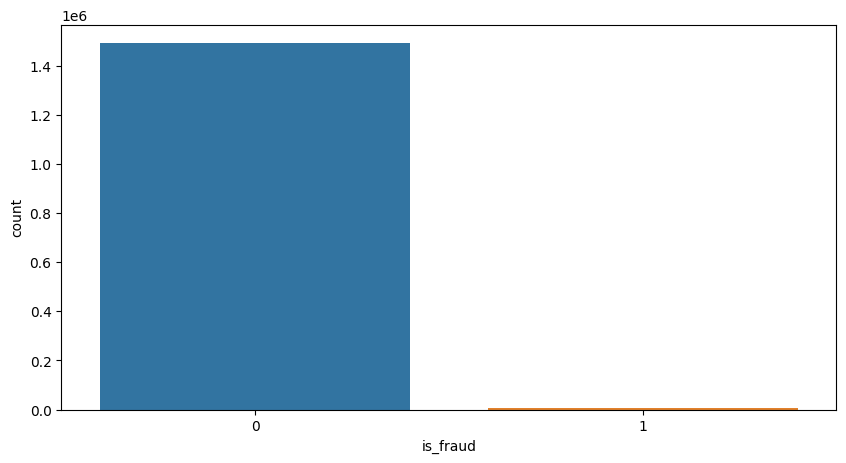

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x= df['is_fraud'])
plt.show()

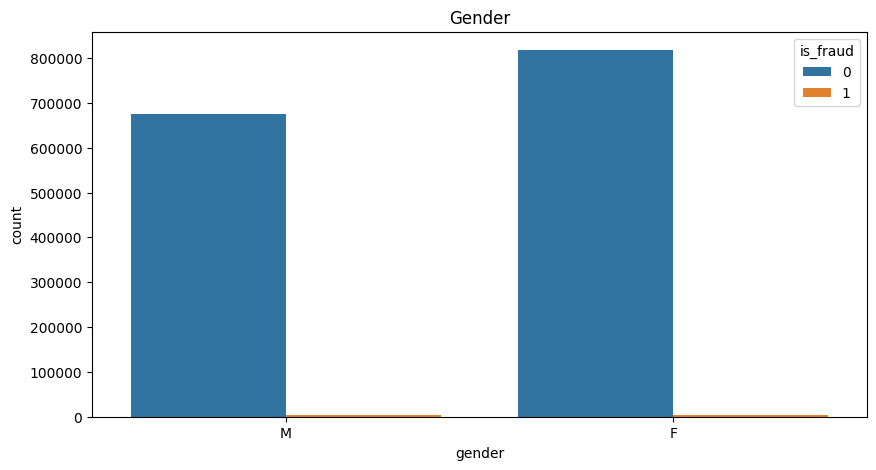

In [16]:
plt.figure( figsize = (10,5))
sns.countplot(x = 'gender', hue = 'is_fraud', data = df)
plt.title('Gender')
plt.show()

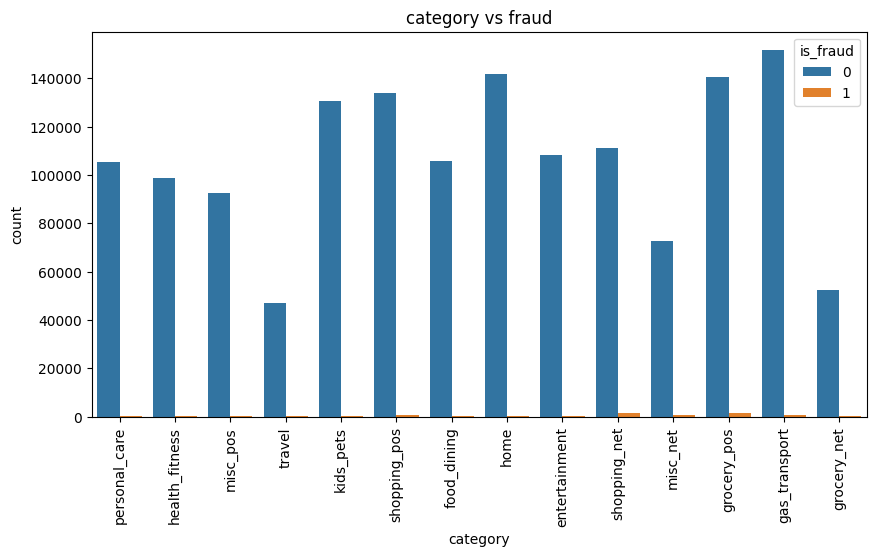

In [17]:
plt.figure( figsize = (10,5))
sns.countplot(x = 'category', hue = 'is_fraud', data = df)
plt.title('category vs fraud')
plt.xticks(rotation = 90)
plt.show()

# Correlation Matrix

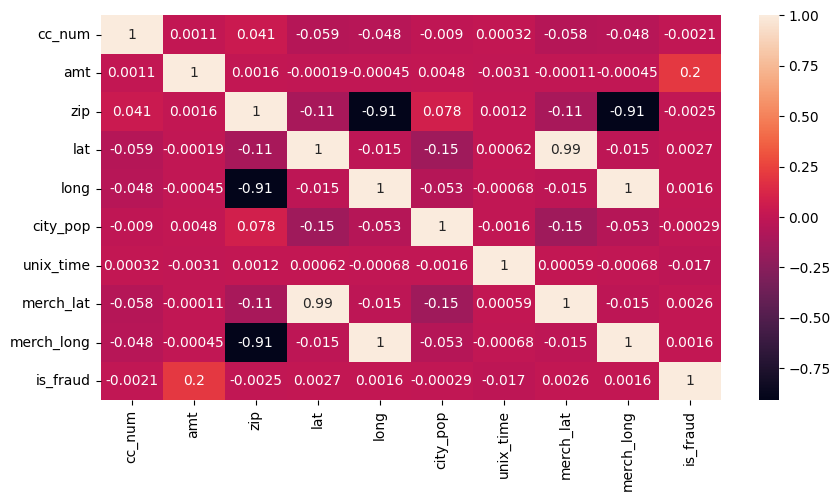

In [18]:
# correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
# sitribution of legit and fradulent transaction
df['is_fraud'].value_counts()

0    1492174
1       7496
Name: is_fraud, dtype: int64

This Dataset is highly unbalanced

0 for Normal Transaction                  
1 for Fraudulent Transaction

In [20]:
#separating the data for analysis
legit = df[df.is_fraud == 0]
fraud = df[df.is_fraud == 1]

In [21]:
print(legit.shape)
print(fraud.shape)

(1492174, 22)
(7496, 22)


In [22]:
# statistical measure of the data
legit.amt.describe()

count    1.492174e+06
mean     6.765720e+01
std      1.541680e+02
min      1.000000e+00
25%      9.600000e+00
50%      4.718000e+01
75%      8.253000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [23]:
fraud.amt.describe()

count    7496.000000
mean      529.286163
std       392.641964
min         1.180000
25%       225.645000
50%       379.495000
75%       904.600000
max      1371.810000
Name: amt, dtype: float64

In [24]:
#compare the values for both transactions
df.groupby('is_fraud').mean()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,
0,4.175367e+17,67.657196,48820.821603,38.53600,-90.230351,88760.167310,1.357091e+09,38.535897,-90.230377
1,3.794600e+17,529.286163,47856.681564,38.72711,-89.912060,87534.244397,1.352422e+09,38.720730,-89.915310


Splitting the data into features and targets

In [64]:
X = df.drop(columns = 'is_fraud', axis = 1)
Y = df['is_fraud']

In [65]:
print(X)

       trans_date_trans_time               cc_num  \
0           21-06-2020 12:14     2291160000000000   
1           21-06-2020 12:14     3573030000000000   
2           21-06-2020 12:14     3598220000000000   
3           21-06-2020 12:15     3591920000000000   
4           21-06-2020 12:15     3526830000000000   
...                      ...                  ...   
943946      12-01-2020 12:30      375000000000000   
943947      12-01-2020 12:32  4210000000000000000   
943948      12-01-2020 12:33        4480000000000   
943949      12-01-2020 12:33     4100000000000000   
943950      12-01-2020 12:33     3550000000000000   

                                     merchant        category    amt   first  \
0                       fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                        fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2        fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                           fraud_Haley Gro

In [66]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
943946    0
943947    0
943948    0
943949    0
943950    0
Name: is_fraud, Length: 1499670, dtype: int64


In [68]:
# Encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder
column = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
en = OrdinalEncoder()
X[column] = en.fit_transform(X[column])

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.52246371, -0.31702963, -0.11954443, ...,  0.74520443,
        -0.89134208,  0.65608704],
       [ 0.52246371, -0.31605051,  1.23306628, ...,  0.74520483,
         0.17897179, -1.43393222],
       [ 0.52246371, -0.31603127,  1.33252295, ...,  0.74520584,
         0.38372838,  1.16512386],
       ...,
       [-0.48256612, -0.31877626,  0.26336375, ...,  0.04678718,
        -0.9330267 ,  0.23178512],
       [-0.48256612, -0.315648  ,  0.9695061 , ...,  0.04678718,
        -0.01478414,  0.84824919],
       [-0.48256612, -0.3160681 ,  1.06398994, ...,  0.04678875,
        -0.98821613, -0.47074972]])

# Split the data into Training data and Test data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [72]:
print(X.shape, X_train.shape, X_test.shape)

(1499670, 21) (1199736, 21) (299934, 21)


# Model Training

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
lr_ac = accuracy_score(Y_test, y_pred)*100
print('Accuracy of Logistic Regression',lr_ac)

Accuracy of Logistic Regression 99.50555788940234


# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=600,random_state=42)
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
dt_ac = accuracy_score(Y_test, y_pred)*100
print('Accuracy of Decision Tree',dt_ac)

Accuracy of Decision Tree 99.63491968233012


# Random Forest



In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)
rf.fit(X_train, Y_train)
y_predict = rf.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
rd_ac = accuracy_score(Y_test,y_predict)*100
print('Accuracy of Random Forest',rd_ac)

Accuracy of Random Forest 99.59157681356565


In [106]:
models = pd.DataFrame  ({'Model':['LogisticRegression','Decision tree','Random Forest'],
                         'Accuracy Score' : [lr_ac, dt_ac, rd_ac]})
models

,Model,Accuracy Score
0,LogisticRegression,99.505558
1,Decision tree,99.634920
2,Random Forest,99.591577
